In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply

In [2]:
titanic = pd.read_csv("titanic.csv")

titanic.head()

titanic.shape

(891, 12)

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

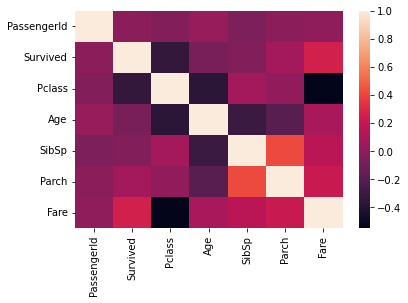

In [4]:
import seaborn as sns
sns.heatmap(titanic.corr())

In [5]:
titanic.drop(["Name","Cabin","PassengerId",], axis=1 ,inplace=True)

In [6]:
mean = titanic["Age"].mean()

std = titanic["Age"].std()


In [7]:
is_null = titanic["Age"].isnull().sum()

rand_age = np.random.randint(mean - std, mean + std, size = is_null)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [8]:
age_slice = titanic["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
titanic["Age"] = age_slice

In [9]:
sex= pd.get_dummies(titanic["Sex"],drop_first=True)

embarked= pd.get_dummies(titanic["Embarked"],drop_first=True)

pclass= pd.get_dummies(titanic["Pclass"],drop_first=True)


titanic2 =pd.concat([sex,embarked,pclass],axis=1)


In [10]:
titanic = pd.concat([titanic,titanic2],axis=1)

titanic.head()

titanic.drop(["Pclass","Embarked","Sex"], axis=1,inplace =True)

In [11]:
titanic.head()

,Survived,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,35.0,0,0,373450,8.0500,1,0,1,0,1


In [12]:
titanic.drop("Ticket",axis=1, inplace=True)
titanic.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [13]:
X= titanic.drop("Survived",axis=1)
y= titanic["Survived"]


In [14]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [15]:
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size= 0.20)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel = LogisticRegression()

In [18]:
logmodel.fit(X_train, y_train)

C:\Users\Prashant Varshney\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
logmodel.score(X_train,y_train)

0.7991573033707865

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
tree.score(X_train, y_train)

0.9901685393258427